<a href="https://colab.research.google.com/github/bogatovam/cv-hse/blob/main/CV_HW_09_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка окружения

In [47]:
!pip install opencv-python

In [48]:
import cv2
import numpy as np
import PIL.Image
import PIL.ExifTags

## Задание №1

Найти матрицу внутренних параметров камеры изображения, предполагая, что оптическая ось проходит строго через центр изображения.
Фокусное расстояние взять равным 24мм, использовать значение dpi из EXIF.

**Решение.** Имея метаданные изображения (exif) можно найти параметры камеры

>$
 f_i = f * dpi_i
$

>$
 c_i = image size_i/2
$

In [49]:
!curl https://raw.githubusercontent.com/bogatovam/cv-hse/main/GOPR01170000.jpg > task1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100k  100  100k    0     0   251k      0 --:--:-- --:--:-- --:--:--  250k


In [50]:
focal_distance_mm = 24
inch_mm = 25.4

In [51]:
img = PIL.Image.open('task1.jpg')
# get exif
exif = { PIL.ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in PIL.ExifTags.TAGS }

dpi_x, dpi_y = img.info['dpi']

cx, cy = [exif[size_i] // 2 for size_i in ["ExifImageWidth", "ExifImageHeight"]]

fx, fy = [focal_distance_mm * dpi_i * inch_mm for dpi_i in [dpi_x, dpi_y]]

K = [[fx, 0, cx],
     [0, fy, cy],
     [0,  0,  1]]

K = np.array(K)

In [52]:
K

array([[4.38912e+04, 0.00000e+00, 4.80000e+02],
       [0.00000e+00, 4.38912e+04, 2.70000e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00]])

## Задание №2

Используя матрицу внутренних параметров, запустить функцию cv2.undistort() на изображении, и записать в файл изображение с компенсацией искажений линзы.


**Решение.** 

In [53]:
!curl https://raw.githubusercontent.com/bogatovam/cv-hse/main/camera.xml > camera.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   942  100   942    0     0   2337      0 --:--:-- --:--:-- --:--:--  2337


In [54]:
file = "camera.xml"
image_name = "task1.jpg"

In [55]:
img = cv2.imread(image_name)
cv_file  = cv2.FileStorage(file, cv2.FILE_STORAGE_READ)

mtx = cv_file.getNode('camera_matrix').mat()
dist = cv_file.getNode('distortion_coefficients').mat()

newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (img.shape[1], img.shape[0]), 1,  (img.shape[1], img.shape[0]))
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
cv2.imwrite('result.jpg', dst)

True

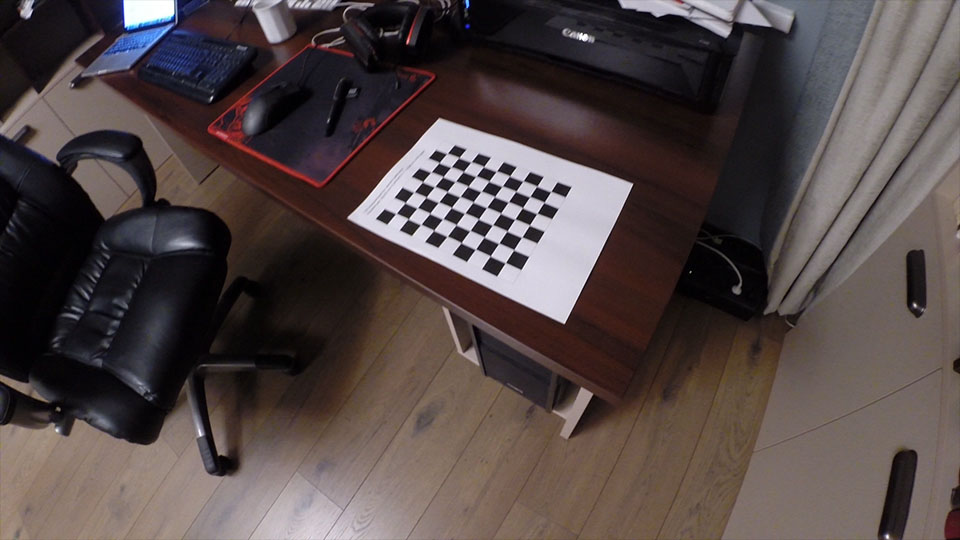

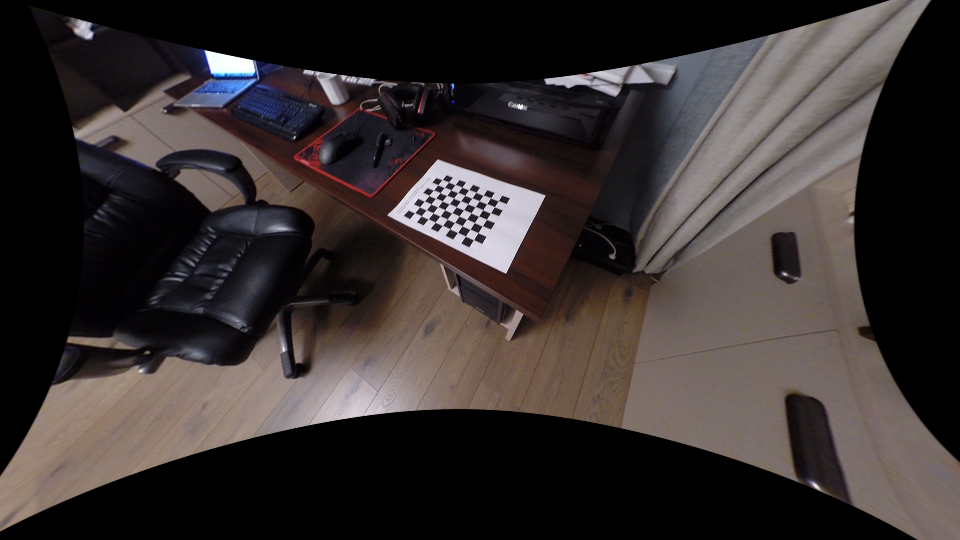

In [56]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)
cv2_imshow(dst)